# Bank Marketing Data - A Decision Tree Approach

## Aim:
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [3]:
# Load data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Summay of data

### Categorical Variables :
**[1] job      :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital  :** married, single, divorced
<br>**[3] education:** secondary, tertiary, primary, unknown
<br>**[4] default  :** yes, no
<br>**[5] housing  :** yes, no
<br>**[6] loan     :** yes, no 
<br>**[7] deposit  :** yes, no ** (Dependent Variable)**
<br>**[8] contact  :** unknown, cellular, telephone
<br>**[9] month    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome:** unknown, other, failure, success

### Numerical Variables:
**[1] age 
<br>[2] balance
<br>[3] day
<br>[4] duration
<br>[5] campaign
<br>[6] pdays
<br>[7] previous **

In [4]:
# Check if the data set contains any null values - Nothing found!
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


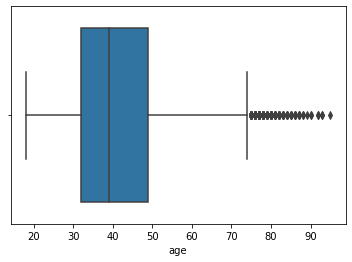

In [6]:
# Boxplot for 'age'
g = sns.boxplot(x=bank["age"])

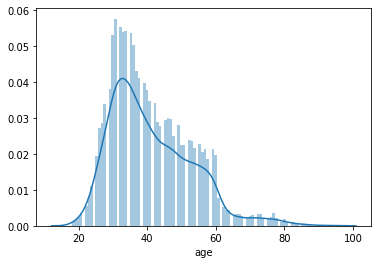

In [7]:
# Distribution of Age
sns.distplot(bank.age, bins=100)

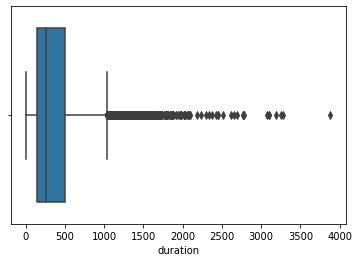

In [8]:
# Boxplot for 'duration'
g = sns.boxplot(x=bank["duration"])

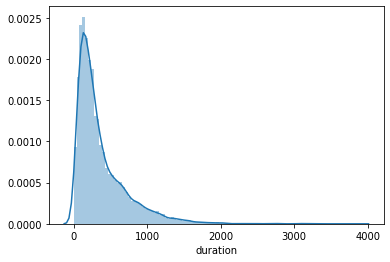

In [9]:
sns.distplot(bank.duration, bins=100)

### Convert categorical data

In [10]:
# Make a copy for parsing
bank_data = bank.copy()

#### ------------------------------ job ------------------------------

In [11]:
# Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [12]:
# Different types of job categories and their counts
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [13]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [14]:
# New value counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

#### ------------------------------ poutcome ------------------------------

In [15]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [16]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

#### ------------------------------ contact ------------------------------

In [17]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

#### ------------------------------ default ------------------------------

In [19]:
bank_data["default"].unique()

array(['no', 'yes'], dtype=object)

In [20]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

#### ------------------------------ housing ------------------------------

In [21]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

#### ------------------------------ loan ------------------------------

In [22]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

#### ------------------------------ month, day ------------------------------

In [23]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#### ------------------------------ deposit ------------------------------

In [39]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

#### ------------------------------ pdays ------------------------------

In [24]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [25]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [26]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [28]:
bank_data['recent_pdays'].value_counts()

0.000100    8324
0.010870     106
0.005495      89
0.010989      84
0.005525      81
            ... 
0.002469       1
0.001289       1
0.002681       1
0.002096       1
0.001208       1
Name: recent_pdays, Length: 472, dtype: int64

In [29]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,deposit,default_cat,housing_cat,loan_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,no,0,1,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,no,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,no,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,no,0,0,1,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,no,0,0,0,0.000100


### ------------------------------ Convert to dummy values ------------------------------

#### pd.get_dummies
Convert categorical variable into dummy/indicator variables.

In [30]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,deposit,default_cat,housing_cat,loan_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,yes,0,1,0,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,yes,0,0,0,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,yes,0,1,0,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,yes,0,1,0,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,yes,0,0,0,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [31]:
bank_with_dummies.shape

(11162, 27)

In [32]:
bank_data.shape

(11162, 14)

In [33]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,recent_pdays,job_blue-collar,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.003124,0.174162,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.030686,0.379266,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.001919,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations on whole population

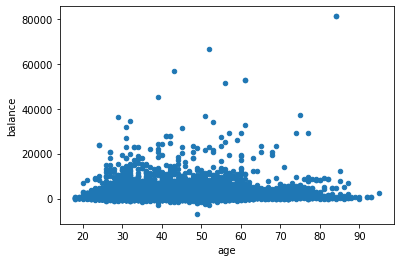

In [34]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 20000.

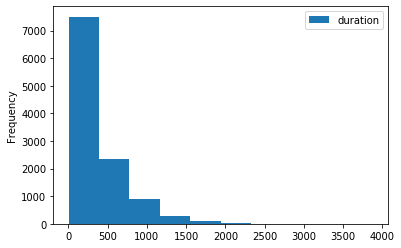

In [35]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

#### Analysis on people who sign up for a term deposite

In [38]:
bank_with_dummies['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [40]:
# People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,recent_pdays,job_blue-collar,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,0.004238,0.133863,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.035686,0.340537,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.005128,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
bank_with_dummies.shape[0]

11162

In [ ]:
bank_with_dummies['deposit_cat']

In [43]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_data.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [45]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_data.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

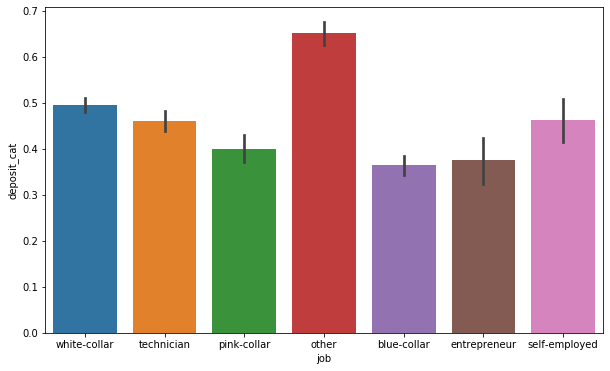

In [46]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

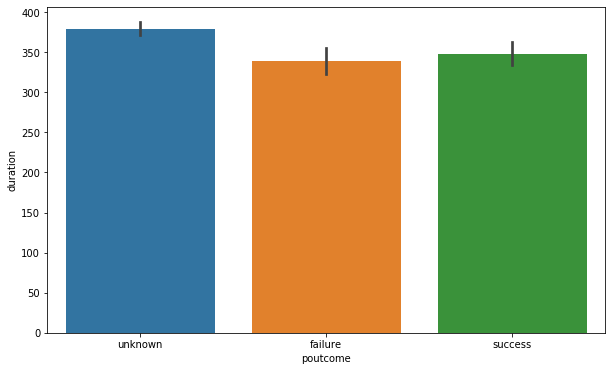

In [47]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

> ## Classification

In [66]:
bank_data['deposit_cat'].unique()

array([1, 0], dtype=int64)

In [96]:
# make a copy
#bank_with_dummies['deposit_cat'] = bank_data['deposit_cat']#.map({'yes':1, 'no':0})
bankcl = bank_with_dummies
#bankcl['deposit'] = bankcl['deposit'].map({'yes':1, 'no':0})

In [97]:
# The Correltion matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,deposit,default_cat,housing_cat,loan_cat,recent_pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown,deposit_cat
age,1.000000,0.112300,0.000189,-0.005278,0.020169,0.034901,-0.011425,-0.168700,-0.031418,0.019102,...,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992,0.034901
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,0.081129,-0.060954,-0.077092,-0.084589,-0.004379,...,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524,0.081129
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,0.451919,-0.009760,0.035051,-0.001914,-0.014868,...,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725,0.451919
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,-0.128081,0.030975,0.006660,0.034722,-0.026296,...,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907,-0.128081
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,0.139867,-0.035273,-0.000840,-0.022668,0.122076,...,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921,0.139867
deposit,0.034901,0.081129,0.451919,-0.128081,0.139867,1.000000,-0.040680,-0.203888,-0.110580,0.034457,...,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785,1.000000
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,-0.040680,1.000000,0.011076,0.076434,-0.011290,...,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403,-0.040680
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,-0.203888,0.011076,1.000000,0.076761,-0.029350,...,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375,-0.203888
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,-0.110580,0.076434,0.076761,1.000000,-0.012697,...,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686,-0.110580
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,0.034457,-0.011290,-0.029350,-0.012697,1.000000,...,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890,0.034457


Text(0.5, 1, 'Heatmap of Correlation Matrix')

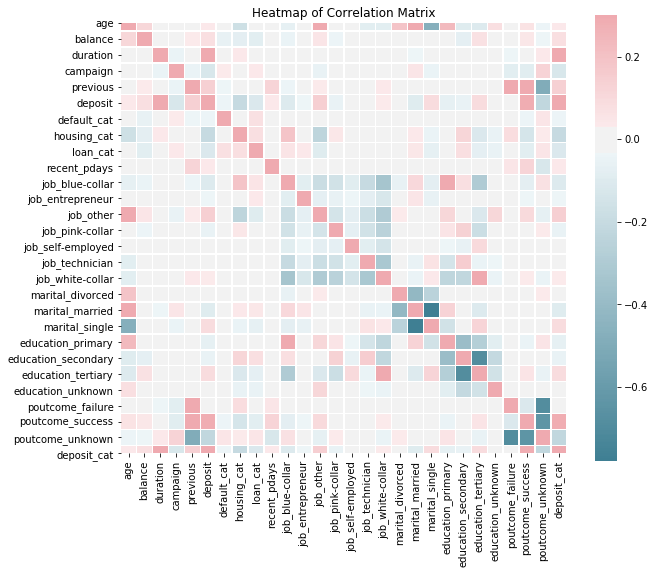

In [98]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [99]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
deposit,1.000000
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457


> ## Build the Data Model

In [113]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', 1)

data_drop_deposite = data_drop_deposite[['age', 'balance', 'duration', 'campaign', 'previous', 
       'default_cat', 'housing_cat', 'loan_cat', 'recent_pdays',
       'job_blue-collar', 'job_entrepreneur', 'job_other', 'job_pink-collar',
       'job_self-employed', 'job_technician', 'job_white-collar',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown']]

label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

#### Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node.

In [114]:
#data_drop_deposite['deposit']

In [115]:
# Decision tree with depth = 2
from sklearn import tree

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)

dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7177735468697503
Testing score:  0.7120465741155396


The depth of a decision tree is the length of the longest path from a root to a leaf. The size of a decision tree is the number of nodes in the tree. Note that if each node of the decision tree makes a binary decision, the size can be as large as 2d+1−1, where d is the depth.

In [116]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)

dt3.fit(data_train, label_train)

dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)

dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.7689550901556725
Testing score:  0.7532467532467533


In [117]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)

dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)

dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7867622354127002
Testing score:  0.7716077026421854


In [118]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)

dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)

dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8136409452346287
Testing score:  0.7890729959695477


In [119]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)

dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)

dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7232422749664129


#### Compare Training and Testing scores for various tree depths used

In [120]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7177735468697503   0.7120465741155396
3        0.7689550901556725   0.7532467532467533
4        0.7867622354127002   0.7716077026421854
6        0.8136409452346287   0.7890729959695477
max                     1.0   0.7232422749664129


It could be seen that, higher the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 2 seems more reasonable as both training and test scores are reasonably high.

In [121]:
# Let's generate the decision tree for depth = 2
# Create a feature vector
features = bankcl.columns.tolist()

# Uncomment below to generate the digraph Tree.
#tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)

In [122]:
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'deposit',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown',
 'deposit_cat']

****Contents of "tree_depth_2.dot":  ****  
digraph Tree {  
node [shape=box] ;  
0 [label="duration <= 206.5\ngini = 0.4986\nsamples = 8929\nvalue = [4700, 4229]"] ;  
1 [label="poutcome_failure <= 0.5\ngini = 0.3274\nsamples = 3612\nvalue = [2867, 745]"] ;  
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;  
2 [label="gini = 0.2733\nsamples = 3380\nvalue = [2828, 552]"] ;  
1 -> 2 ;  
3 [label="gini = 0.2797\nsamples = 232\nvalue = [39, 193]"] ;  
1 -> 3 ;  
4 [label="duration <= 441.5\ngini = 0.4518\nsamples = 5317\nvalue = [1833, 3484]"] ;  
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;  
5 [label="gini = 0.4996\nsamples = 2762\nvalue = [1340, 1422]"] ;  
4 -> 5 ;  
6 [label="gini = 0.3114\nsamples = 2555\nvalue = [493, 2062]"] ;  
4 -> 6 ;  
}

Thee decision tree for depth =2 can be found at below link:
(I wasn't successful in attaching the image to Kaggle)
https://i.imgur.com/YML2E7h.png


Based on the decision tree results, it could be seen that higher the "duration", bank is able to sign up more people to term deposites.

In [123]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1], dtype=int64)

In [124]:
# Create a feature vector
features = data_drop_deposite.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown']

In [125]:
# Investigate most important features with depth =2

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.8825899612149789
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.117410038785021
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0


## Predictions

In [126]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [129]:
# Predict: Successful deposite with a call duration = 371 sec

print(dt2.predict_proba(np.array([10000, 0, 371, 0, 0, 0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)))
print(dt2.predict(np.array([10000, 0, 371, 0, 0, 0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432

[[0.48515568 0.51484432]]
[1]


In [130]:
# Predict: Successful deposite with a maximun call duration = 3881 sec

print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[1]


In [131]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposite.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
default_cat               0.000000
housing_cat               1.000000
loan_cat                  0.000000
recent_pdays              0.005747
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
Name: 985, dtype: float64

In [132]:
# Predict: Probability for above

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0]).reshape(1, -1)))
#print(ctree.predict(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]


#### AUC
AUC is an abbrevation for area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best. An example of its application are ROC curves. Here, the true positive rates are plotted against false positive rates.

#### ROC
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

In [133]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7120465741155396

Area Under Curve: 
0.7820219884508357


In [134]:
# Make predictions on the test set
preds = dt6.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt6.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7890729959695477

Area Under Curve: 
0.8631138509546559
